In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
import sklearn.metrics
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.naive_bayes import GaussianNB

In [121]:
df = pd.read_csv('training_sample.csv')

### In this analysis I used customer propensity to purchase dataset, a data set logging shoppers interactions on an online store.

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

In [123]:
df[df.columns[1:]].head(4)

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0


In [124]:
df.isna().sum()

UserID                     0
basket_icon_click          0
basket_add_list            0
basket_add_detail          0
sort_by                    0
image_picker               0
account_page_click         0
promo_banner_click         0
detail_wishlist_add        0
list_size_dropdown         0
closed_minibasket_click    0
checked_delivery_detail    0
checked_returns_detail     0
sign_in                    0
saw_checkout               0
saw_sizecharts             0
saw_delivery               0
saw_account_upgrade        0
saw_homepage               0
device_mobile              0
device_computer            0
device_tablet              0
returning_user             0
loc_uk                     0
ordered                    0
dtype: int64

In [125]:
df.columns

Index(['UserID', 'basket_icon_click', 'basket_add_list', 'basket_add_detail',
       'sort_by', 'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_mobile', 'device_computer', 'device_tablet',
       'returning_user', 'loc_uk', 'ordered'],
      dtype='object')

In [126]:
# extracting how many users are active on defferent type of devices

num_comp_dev = (df['device_computer'].sum() / 455401)*100
num_tab_dev = (df['device_tablet'].sum() / 455401)*100
num_mob_dev = (df['device_mobile'].sum() / 455401)*100

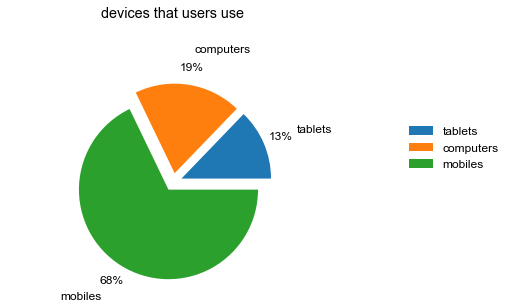

In [127]:
fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size']=12
labels = ['tablets', 
         'computers', 'mobiles']
percentages = [num_tab_dev, num_comp_dev, num_mob_dev]
explode=(0.1,0.1, 0.1)
ax.pie(percentages, explode=explode, labels=labels,  
       autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("devices that users use \n\n\n")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

### It is obvious that number of users that entered the website with their phones is significantly more than other devices. Considering other analysis and researches, we can see the importance of phone and mobiles friendly ecommerces.

In [128]:
mobile_ordered = df.loc[df['device_mobile']==1]['ordered'].sum()
tablet_ordered = df.loc[df['device_tablet']==1]['ordered'].sum()
computer_ordered = df.loc[df['device_computer']==1]['ordered'].sum()

In [129]:
mobile_not = df.loc[df['device_mobile']==1]['UserID'].count()
tablet_not = df.loc[df['device_tablet']==1]['UserID'].count()
computer_not = df.loc[df['device_computer']==1]['UserID'].count()


In [130]:
df.loc[df['device_computer']==1, 'devices'] = 'computer'
df.loc[df['device_mobile']==1, 'devices'] = 'mobile'
df.loc[df['device_tablet']==1, 'devices'] = 'tablet'

df['num_devices'] = df['device_computer'] + df['device_mobile'] + df['device_tablet']

<AxesSubplot:xlabel='num_devices', ylabel='Count'>

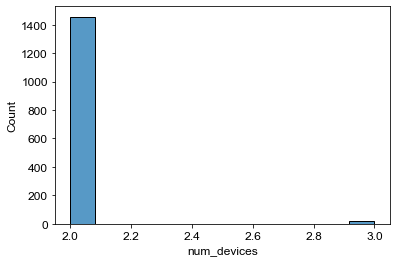

In [131]:
sns.histplot(data=df[df['num_devices']!=1], x='num_devices')

### There are some users that entered the website with more than one device but it's not noticeable, so I chose to ignore them.

In [132]:
contingency_table = pd.crosstab(df.ordered, df.devices) #Contingency Table
contingency_table

devices,computer,mobile,tablet
ordered,,,
0,82334,298485,55489
1,5112,11013,2968


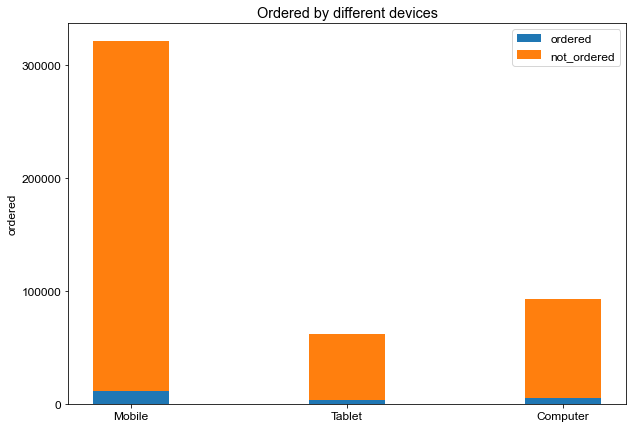

In [133]:
N = 3
 
ordered = (contingency_table['mobile'][1], contingency_table['tablet'][1], contingency_table['computer'][1])
not_ordered = (contingency_table['mobile'].sum(), contingency_table['tablet'].sum(), contingency_table['computer'].sum())

ind = np.arange(N)  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, ordered, width)
p2 = plt.bar(ind, not_ordered, width,
             bottom = ordered)
 
plt.ylabel('ordered')
plt.title('Ordered by different devices')
plt.xticks(ind, ('Mobile', 'Tablet', 'Computer'))
plt.yticks(np.arange(0, 350000, 100000))
plt.legend((p1[0], p2[0]), ('ordered', 'not_ordered'))
 
plt.show()

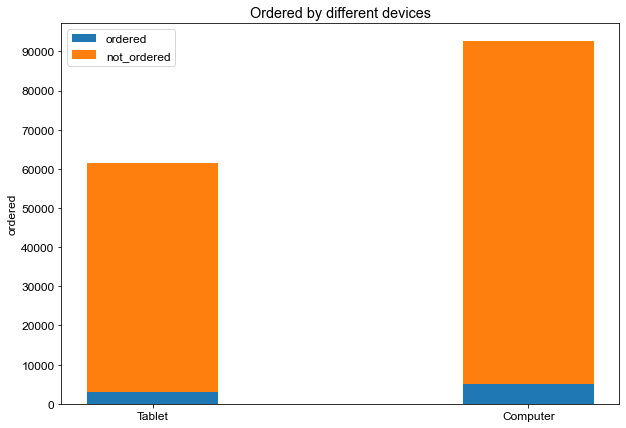

In [134]:
N = 2
 
ordered = (contingency_table['tablet'][1], contingency_table['computer'][1])
not_ordered = (contingency_table['tablet'].sum(), contingency_table['computer'].sum())

ind = np.arange(N)  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, ordered, width)
p2 = plt.bar(ind, not_ordered, width,
             bottom = ordered)
 
plt.ylabel('ordered')
plt.title('Ordered by different devices')
plt.xticks(ind, ('Tablet', 'Computer'))
plt.yticks(np.arange(0, 100000, 10000))
plt.legend((p1[0], p2[0]), ('ordered', 'not_ordered'))
 
plt.show()

In [135]:
contingency_table.apply(lambda r:r/r.sum(),axis=0)

devices,computer,mobile,tablet
ordered,,,
0,0.941541,0.964417,0.949228
1,0.058459,0.035583,0.050772


### since it's too close, it's not possible to surely say that for example, mobile users order more than others. In order to make sure we perform a chi-squared test. we want to see if <ordered> variable is related to type of devices.

In [136]:
contingency_table = pd.crosstab(df.ordered, df.devices) #Contingency Table
print(contingency_table)
contingency_table.apply(lambda r:r/r.sum(),axis=0)

devices  computer  mobile  tablet
ordered                          
0           82334  298485   55489
1            5112   11013    2968


devices,computer,mobile,tablet
ordered,,,
0,0.941541,0.964417,0.949228
1,0.058459,0.035583,0.050772


In [137]:
print(contingency_table)
stat, p, dof, expected = chi2_contingency(contingency_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

    
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

devices  computer  mobile  tablet
ordered                          
0           82334  298485   55489
1            5112   11013    2968
dof=2
[[ 83779.76633341 296522.08357909  56006.15008751]
 [  3666.23366659  12975.91642091   2450.84991249]]
probability=0.950, critical=5.991, stat=1018.912
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


### We can see that <ordered> variable and <devices> are dependednt.

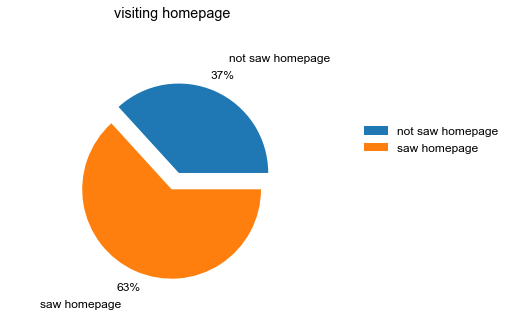

In [138]:
saw_homepage = (df[df['ordered']==1]['saw_homepage'].sum() / df[df['ordered']==1].shape[0])*100

fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size']=12

labels = ['not saw homepage', 
         'saw homepage']
percentages = [100-saw_homepage, saw_homepage]
explode=(0.1,0.1)

ax.pie(percentages, explode=explode, labels=labels,  
       autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("visiting homepage \n\n\n")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

In [139]:
contingency_table = pd.crosstab(df.ordered, df.saw_homepage)
contingency_table.apply(lambda r: r/r.sum(), axis=1)

saw_homepage,0,1
ordered,,
0,0.724953,0.275047
1,0.367726,0.632274


### Also, judging by the chart, we can find out that 37 percent of visitors won't check the first page of our website.

In [140]:
contingency_table = pd.crosstab(df.ordered, df.sign_in)
print(contingency_table)
contingency_table = contingency_table.apply(lambda r: r/r.sum(), axis=1)
contingency_table

sign_in       0      1
ordered               
0        414840  21468
1           117  18976


sign_in,0,1
ordered,,
0,0.950796,0.049204
1,0.006128,0.993872


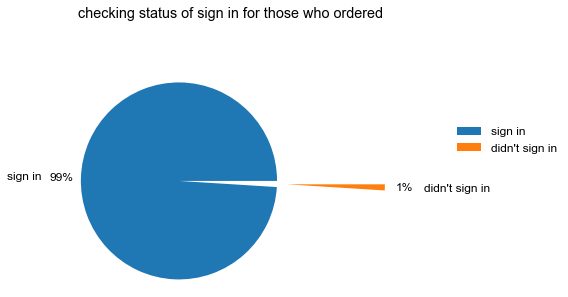

In [141]:
fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size']=12

labels = ["sign in", 
         "didn't sign in"]
percentages = [100-contingency_table[1][1], contingency_table[1][1]]
explode=(1,0.1)

ax.pie(percentages, explode=explode, labels=labels,  
       autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("checking status of sign in for those who ordered \n\n\n")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

### Since 117 users ordered on website without signing in, I assume that there is this option that you can order what you want from website without signing in. On the other hand we can also see that 99 percent of users that ordered were signed in. in this regard we performed a chi-squared test just to make sure about this dependency.

In [142]:
contingency_table = pd.crosstab(df.ordered, df.sign_in) #Contingency Table
print(contingency_table)
contingency_table.apply(lambda r:r/r.sum(),axis=0)

sign_in       0      1
ordered               
0        414840  21468
1           117  18976


sign_in,0,1
ordered,,
0,0.999718,0.530808
1,0.000282,0.469192


In [143]:
print(contingency_table)
stat, p, dof, expected = chi2_contingency(contingency_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

    
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

sign_in       0      1
ordered               
0        414840  21468
1           117  18976
dof=1
[[397559.64250408  38748.35749592]
 [ 17397.35749592   1695.64250408]]
probability=0.950, critical=3.841, stat=201714.774
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [144]:
df['sign_in'].sum() / df.shape[0] * 100

8.880964249090361

### We can very well judge (informally) that there is a significant difference between proportions of sign_in users to that of not sign_in. Let us prove that statistically!

In [145]:
from statsmodels.stats.proportion import proportions_ztest

count = df['sign_in'].sum()
value = 0.05
nobs = df.shape[0]

stat, pval = proportions_ztest(count, nobs, value)
print('{0:0.3f}'.format(pval))

0.000


### les than alpha = 0.5, so we can say that there is a difference. Anothher thing that i like tp check, is that if type of devices are related to ordering behavior of users. in this case, contingency table shows us that mobile users are more than other devices, but 3 percent of mobile users will eventualy order in our website, however other devices despite the fewer users, have 2 percent more orders in website.
### Now what I want to check is that if type of device is related to the ordered variable. Let's see!

In [146]:
contingency_table = pd.crosstab(df.ordered, df.devices) #Contingency Table
print(contingency_table)
contingency_table.apply(lambda r:r/r.sum(),axis=0)

devices  computer  mobile  tablet
ordered                          
0           82334  298485   55489
1            5112   11013    2968


devices,computer,mobile,tablet
ordered,,,
0,0.941541,0.964417,0.949228
1,0.058459,0.035583,0.050772


In [147]:
print(contingency_table)
stat, p, dof, expected = chi2_contingency(contingency_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

    
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

devices  computer  mobile  tablet
ordered                          
0           82334  298485   55489
1            5112   11013    2968
dof=2
[[ 83779.76633341 296522.08357909  56006.15008751]
 [  3666.23366659  12975.91642091   2450.84991249]]
probability=0.950, critical=5.991, stat=1018.912
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


### As you can see, it is evident that these two variables are dependent!

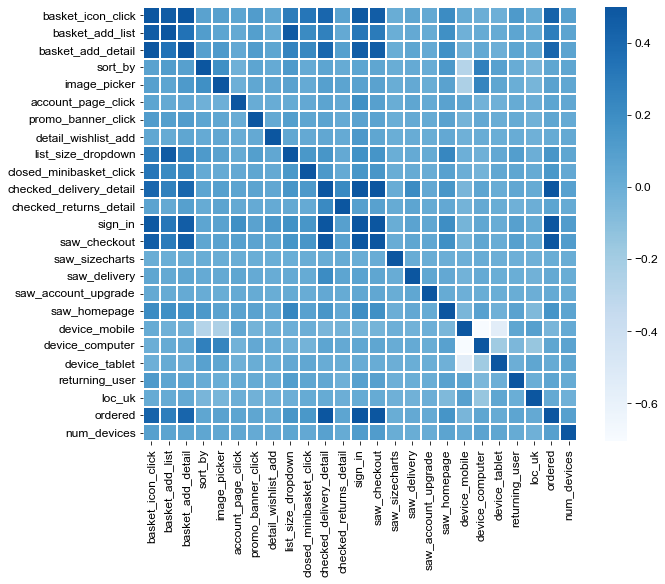

In [148]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmax=0.5, center=0,
            square=True, linewidths=2, cmap='Blues')
plt.savefig("heatmap.png")
plt.show()

### If you look at this correlation heatmap you can see that there are about 5 variables with high correlation with ordered variable. you can may think that we can use these variables to perform a machine learning algorithm on the dataset. I will do it and in the end explain the Problems of this approach.

In [149]:
df.corr()['ordered']

basket_icon_click          0.428334
basket_add_list            0.287666
basket_add_detail          0.414420
sort_by                    0.054636
image_picker               0.071492
account_page_click         0.057279
promo_banner_click         0.056533
detail_wishlist_add        0.023516
list_size_dropdown         0.154867
closed_minibasket_click    0.140011
checked_delivery_detail    0.798720
checked_returns_detail     0.059484
sign_in                    0.665556
saw_checkout               0.708986
saw_sizecharts             0.007548
saw_delivery               0.031461
saw_account_upgrade        0.025857
saw_homepage               0.157778
device_mobile             -0.042907
device_computer            0.049208
device_tablet              0.016939
returning_user             0.060295
loc_uk                     0.031643
ordered                    1.000000
num_devices                0.088354
Name: ordered, dtype: float64

In [150]:
# Drop columns with low correlation
predictors = df.drop(['ordered','UserID','device_mobile', 'devices'], axis=1)
# predictors = df[['checked_delivery_pdp', 'basket_icon_click', 'sign_in', 'saw_checkout']]
targets = df.ordered

In [151]:
print(predictors.columns)

Index(['basket_icon_click', 'basket_add_list', 'basket_add_detail', 'sort_by',
       'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_computer', 'device_tablet', 'returning_user',
       'loc_uk', 'num_devices'],
      dtype='object')


In [152]:
X_train, X_test, y_train, y_test  =   train_test_split(predictors, targets, test_size=.3)

print( "Predictor - Training : ", X_train.shape, "Predictor - Testing : ", X_test.shape )

Predictor - Training :  (318780, 23) Predictor - Testing :  (136621, 23)


Text(0.5, 1.0, 'Confusion Matrix')

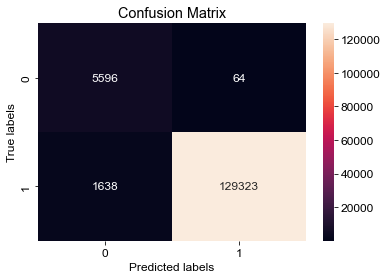

In [153]:
classifier=GaussianNB()
classifier=classifier.fit(X_train,y_train)

predictions=classifier.predict(X_test)

#Analyze accuracy of predictions
cm = sklearn.metrics.confusion_matrix(y_test,predictions, labels=[1,0])

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [154]:
score = sklearn.metrics.accuracy_score(y_test, predictions)
print('jacard score: ', score)

jacard score:  0.987542178728014


### First to analyze the result, we can say that this is good, since false positives are more important here for us (because if we predict that customer will order and it won't hapen, it may cause economic loss), and due to few number of these false positives, we can say that this is acceptable.
### But our analysis has a real problem. Some of the features used in the analysis have a direct relationship with the ordered variable. for example we can assume that <saw_checkout> and <checked_delivery_detail> are some of those variables. thee two actions, specificaly saw_checkout hapens when you are ordering and paying for product and its not a good feature to rely on (Data Leakage).
### <basket_add_detail>, <basket_add_list> and <basket_icon_click> have most correlation with ordered variable among others, the main question here is that if these are good features to help us predict the ordering behavior of customer? 
### The answer is: It depends!
### What do you want to predict? what's the routin of ordering in this website? these questions each may change your opinion about these variables. in a normal situation with typical routin of all ecommerce websites, these three variables may help us to perform a prediction. But certainly it will help us to understand the behavior of customer. We know that most users after signing in and clicking on basket icon will order and this knowledge alongside with customer taste from previous purchaces can help us to offer some discounts on products that are in interest of our customer to raise the amount of sale.